# **Modelling motor proteins with random walk in a ratchet and constant potential**

# **Exercise 1:** _The diffusion equation_
<hr>

First of, we show that a proposed function $\phi(x, t)$ is a solution to the diffusion equation. We then proceed to derive three equations, {$p^+, p^0, p^-$}, which we will later use to simulate random walk movement. This lays the foundation for the model which relates diffusion to random walk. Lastly, we will be applying some boundary conditions on these equations to explore how a particle in a given energy landscape behaves at different temperatures.

## **a)**

We are given the function:

$$
\phi(x,t) = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

We want to show that it satisfies the diffusion equation:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$


### **Step 1: Compute $ \frac{\partial \phi}{\partial t} $**

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the product rule we obtain

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right)  \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \frac{\partial}{\partial t} \left( \int_{-\infty}^{\infty} h(y)  e^{-\frac{(x-y)^2}{4Dt}} \, dy \right).
$$
Furthermore, applying the Lebniz integration rule:

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right) \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) \frac{\partial}{\partial t} e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

Differentiating the prefactor and the exponential term gives

$$
\frac{d}{dt} \left( \frac{1}{\sqrt{4\pi D t}} \right) = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}}.
$$


$$
\frac{\partial}{\partial t} \left( e^{-\frac{(x-y)^2}{4Dt}}\right) = e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Substituting back, we obtain

$$
\frac{\partial \phi}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Which simplifies to
$$
\frac{\partial \phi}{\partial t} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D t^2} - \frac{1}{2t} \right) \, dy.
$$



### **Step 2: Compute $ \frac{\partial^2 \phi}{\partial x^2} $**
$$
\frac{\partial \phi}{\partial x} = \frac{\partial}{\partial x} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the chain rule

$$
\frac{\partial \phi}{\partial x} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left(-\frac{x-y}{2Dt}\right) \, dy.
$$

Differentiating again and we obtain

$$
\frac{\partial^2 \phi}{\partial x^2} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D^2 t^2} - \frac{1}{2Dt} \right) \, dy.
$$


### **Step 3: Verify the Diffusion Equation**

Comparing the expressions for $ \frac{\partial \phi}{\partial t} $ and $ D \frac{\partial^2 \phi}{\partial x^2} $, we find that:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$

Thus, $ \phi(x,t) $ satisfies the diffusion equation.


We know that $\phi(x,t) = \int_{-\infty}^{\infty} dy \, h(y) \frac{1}{\sqrt{4\pi D t}} e^{-\frac{(x-y)^2}{4Dt}}$ represents a distrubution of particles along the x-axis. Furthermore, we can recognize this distrubution as a gaussian distrubution with $\sigma = \sqrt{2 \cdot D\cdot t}$ and $\mu = y$. If we let $t \rightarrow 0$ we obtain $\phi(x, 0) = \int_{-\infty}^{\infty} dy \, h(y) \delta(x - y)$, meaning the entire distrubution is centered on the expectation value $\mu = y$. The physical interpretation would then be that $h(y)$ is the inital place where the particals are released at $t=0$, and since the standard deviation is time dependant, the distrubution becomes more distrubuted along the x-axis.
<hr>

## **1b)**
From the probability of finding a particle at a position $x$ in a potential landscape $V(x)$ as $ P(x) = \frac{e^{-\beta V(x)}}{Z},$ we are going to show how this results in the following probabilities for the particles movement:

$$ p^+ = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}}$$
$$p^0 = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$
$$p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$

By inserting the definition of the canonical partition function $Z$ with the energy being equal to the potential energy $V(x)$ at different positions, we obtain:


$$ P(x) = \frac{e^{-\beta V(x)}}{Z} = \frac{e^{-\beta V(x)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}$$


Since the probability of finding a particle at a position $x$ must be equal to the probability of the particle moving to $x$, we find the probability of the particle moving to $x_0 - 1$ as:


$$ p^-  = P(x_0-1) = \frac{e^{-\beta V(x_0-1)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}.$$ 

Doing the algebra and simplifying gives

$$ p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$


By repeating this process for the remaining steps $x_0$ and $x_0 + 1$, we obtain:


$$p^0 = P(X_0) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$

$$p^+ = P(X_0+1) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}} \quad \blacksquare.$$  
<hr>



## **1c)**

### First case: $k_B T$ $\gg$ $\lvert V(x+1) - V(x) \rvert$

When the temperature $T$ is high, the thermal energy will be greater than the potential difference bewteen $x_0$ and $x_0+1$ for all $x$. It follows that $$\frac {|V(x+1) - V(x)|}{k_BT} \approx 0,$$ and it will always approach $0$, independently of the direction $V(x)$ increases. This implies that all of the exponential terms in $p^+$, $p^0$ and $p^-$ equals $1$, giving the following probabilities $$p^+ = p^0 = p^- = \frac{1}{3},$$

which sums to $1$, following the law of conservation of probability.

**Physical interpretation**

The thermal energy is constant for a given temperature $T$. If the thermal energy is significantly higher than the absolute value of the potential energy differences between two points, the movement of the particles will be determined by the thermal energy. The thermal energy creates a constant energy landscape, with no point $x$ having a higher or lower energy value than others. As a result, the movement of the particles will be random since there are no direction which leads to less energy. Therefore the probability of the particle moving in a specific direction is equal for all the directions. According to the central limit theorem, the resulting distribution will be a Gaussian distribution.

### **Second case: $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$**

For $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$ we need to consider whether the potential energy $V(x)$ increases or decreases for higher values of $x$. We conclude that the particle will only have a probability of moving either left ($x_0-1$) or right ($x_0+1$).

**$V(x)$ increasing to the right: $V(x_0)<V(x_0+1)$**
$$p^+ = \frac{1}{1 + e^{-\frac{1}{k_BT} [V(x_0-1) - V(x_0 + 1)]} + e^{-\frac{1}{k_BT} [V(x_0) - V(x_0+1)]}} = \frac{1}{1 + e^{\frac{1}{k_BT} |(V(x_0-1) - V(x_0 + 1)|)} + e^{\frac{1}{k_BT}|V(x_0) - V(x_0+1)|}} \approx 0$$

$$p^0 = \frac{1}{1 + e^{-\frac{1}{k_BT} [V(x_0-1) - V(x_0)]} + e^{-\frac{1}{k_BT} [V(x_0+1) - V(x_0)]}} = \frac{1}{1 + e^{\frac{1}{k_BT} |V(x_0-1) - V(x_0)|} + e^{-\frac{1}{k_BT} |V(x_0+1) - V(x_0)|}} \approx 0$$

$$p^- = \frac{1}{1 + e^{-\frac{1}{k_BT} [V(x_0+1) - V(x_0-1)]} + e^{-\frac{1}{k_BT} [V(x_0) - V(x_0-1)]}} = \frac{1}{1 + e^{-\frac{1}{k_BT} |V(x_0+1) - V(x_0-1)|} + e^{-\frac{1}{k_BT} |V(x_0) - V(x_0-1)|}} \approx 1$$

**$V(x)$ decreasing to the left: $V(x_0)>V(x_0+1)$**

By using the same mathematical approach as in the case for $V(x_0)<V(x_0+1)$, we obtain
$$p^+ \approx 1$$
$$p^0 \approx 0$$
$$p^- \approx 0$$

For both situations the probability equals 1, following the law of conservation of probability.

**Physical interpretation**

When the difference in potential energy at different positions is greater than the thermal energy, the movement of the particles will be determined by the potential energy landscape. Particles in an energy landscape will always move towards the lowest energy level. When the potential energy increase towards the right, the particles will move towards the left to obtain lower energy. Therefore, the particles moving towards the left is a sure event. If the potential energy decreases towards the right, particles will obtain lower energy levels by moving to the right. Hence, the particles moving towards the right is a sure event.

### **Simplifying the random walk using an energy scale argument**
Using an energy scale argument, we consider the two extremes described in the two boundary conditions. In one extreme, the temperature is significantly larger than the energy potentials and as discussed above, this results in the potential energy being negligible to the probability. In the second extreme case the temperature is significantly smaller than the potential energy. As a result, the potential energy plays the dominating role for the movement. This is assuming that the potential energy grows monotonously as $x$ goes from smaller to bigger values of $x$. However, this might not always be the case. The potential might decrease monotonously, and it might oscillate. This will however not change the proposed argument. For higher temperatures, the potential will still be negligible, while lower temperatures will have probabilities dependant on the potential differences. 
<hr>

# **Exercise 2:** _Random walk in a potential_

Here we will be simulating the distribution of particles in a random walk motion. Throughout the exercise we will subject the particle distribution to potential landscapes of varying geometries and explore the behaviour of the particle movement. Furthermore, we will examine how said movement is affected by thermal energy. The first part of this task contains the functions used in this excercise. 



In [1]:
## IMPORTING LIBRARIES
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter
from scipy.special import erfc
import os

In [2]:
class Particle:
    def __init__(self, potentialFunction, betak):
        self.x = 0
        self.V = potentialFunction
        self.betak = betak

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x - 1) - self.V(self.x + 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x + 1))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x + 1) - self.V(self.x - 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x - 1))))


    def walkStep(self):
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.x -= 1
        if prob > 1 - self.pPlus():
            self.x += 1
        else:
            self.x = self.x
    
    def getPos(self):
        return self.x
    
    def getProb(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())
    

In [11]:
## HOVEDFUNKSJONEN SOM UTFØRER BEREGNINGENE

def calculation(V, name):
    betakList = [0.01, 1, 100]
    fig, ax = plt.subplots(1, 3, figsize=(13, 4))

    for i, betak in enumerate(betakList):
        Particles = [Particle(V, betak) for _ in range(numberOfParticles)]
        for j, _ in enumerate(range(numberOfSteps)):
            #print(f'Step: {j} with beta*k = {betak}')
            for particle in Particles:
                particle.walkStep()

        positions = np.array([particle.getPos() for particle in Particles])
        mu, sigma = stats.norm.fit(positions)
        x = np.linspace(min(positions), max(positions), 1000)
        pdf = stats.norm.pdf(x, mu, sigma)
        ax[i].plot(x, pdf, 'r-', label=f"μ={mu:.2f}, σ={sigma:.2f}")
        ax[i].hist(positions, bins=20, density=True, alpha=0.6, color='g')
        ax[i].set_title(r"$βk = {}$".format(betak))
        ax[i].set_xlabel("Position")
        if i == 0:
            ax[i].set_ylabel("Probability density")
        ax[i].legend(loc='upper left')

    fig.suptitle(f"Particle distribution for {name}")
    plt.show()

numberOfParticles = 10_000 
numberOfSteps = 200

V = {'k' : lambda x: 1,
     '-k*x' : lambda x: -x, 
     'k(x/15 - np.cos(x/3))' : lambda x: x/15 - np.cos(x/3), 
     'k*x**4' : lambda x: x**4}



## 2a)

We are given the potential energy $V(x) = k$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. 

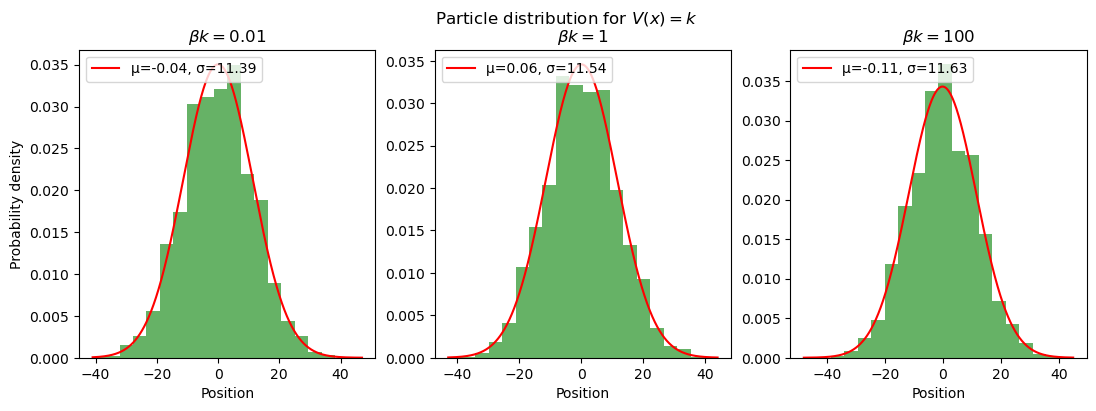

In [12]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k'], r'$V(x)=k$')

We observe that the particles are distributed in a bell curve for all cases $\beta k \in $ {0.01, 1, 100}. This may be explained by inserting the given condition $V(x) = k$ in the distributions for {$p^+, p^0, p^-$}.

$$
p^+ = P(x_0+1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}} \right|_{V(x)=k} = 
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

$$
p^0 = P(x_0+1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0)]} + e^{-\beta [V(x_0-1) - V(x_0)]}} \right|_{V(x)=k} =
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

$$ 
p^- = P(x_0-1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}} \right|_{V(x)=k} =
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

This result shows that a particle in a constant potential landscape moves in an unbiased manner, i.e. the movement reduces to a random walk. From the theory section, $X(t)$ is a stochastic process giving the position of a particle at a time $t$. We now observe that the simulation may be described as a sum of identical stochastic variables. From the central limit theorem we conclude that the sum of these stochastic variables will converge to a normal distribution, as we also observe from the simulation.
<hr>

## 2b)

We are given the potential energy $V(x) = -kx$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. 

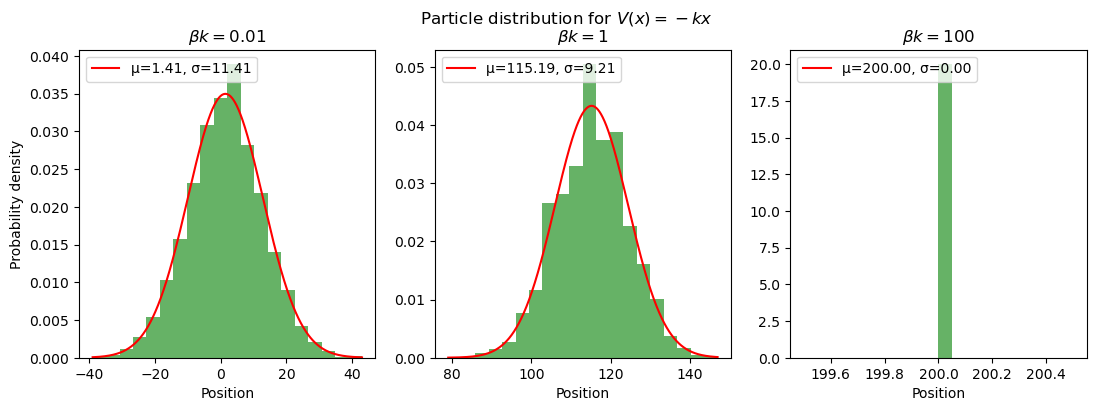

In [14]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['-k*x'], r'$V(x)=-kx$')

The plot shows the particles have a biased movement towards the right, as the energy potential also decreass in that direction. This corresponds to the result from exercise 1c. 
<hr>

# 2c)

We are given the potential energy $V(x) = k(\frac{x}{15}-\cos \frac{x}{3})$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. In addition, we will compare the difference between the particle distribution for $\beta k = 0.1$ and $\beta k = 100$ by analyzing how the particles behave in this potential landscape.

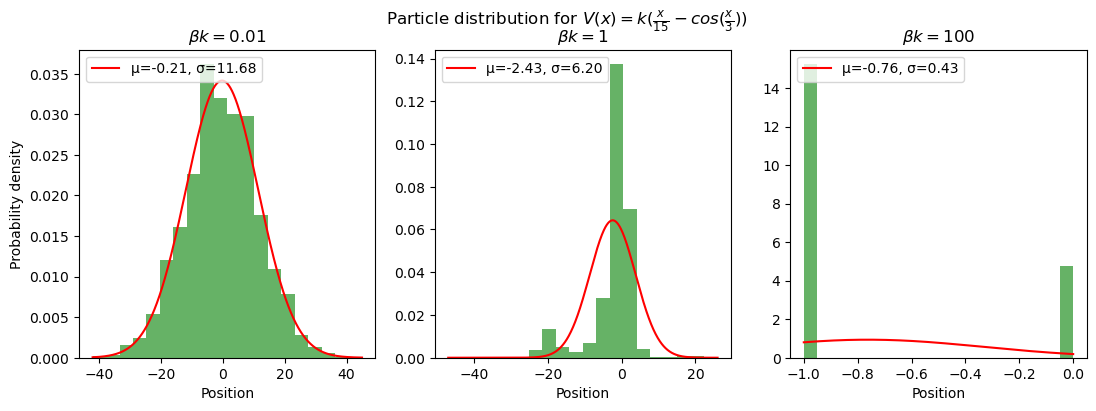

In [17]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k(x/15 - np.cos(x/3))'], r'$V(x)=k(\frac {x}{15} - cos(\frac {x}{3}))$')

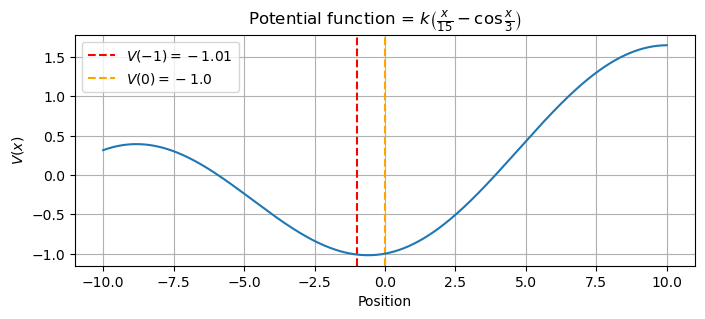

In [21]:
# Plotting the potential 
x = np.linspace(-10,10,1000)
y = [V['k(x/15 - np.cos(x/3))'](i) for i in x]
V_0 = V['k(x/15 - np.cos(x/3))'](0)                                      # calculating the potential in x = 0
V_v = round(V['k(x/15 - np.cos(x/3))'](-1),2) 
                           # calculating the potential in x = -1, rounded to two decimals.
plt.figure(figsize=(8, 3))
plt.axvline(-1, linestyle = "--", color = 'red', label = f"$V(-1) = {V_v}$" )
plt.axvline(0, linestyle = "--", color = 'orange', label = f"$V(0) = {V_0}$")
plt.ylabel("$V(x)$")
plt.xlabel("Position")
plt.title("Potential function = " r"$k\left(\frac{x}{15} - \cos\frac{x}{3}\right)$")
plt.plot(x, y)
plt.legend()
plt.grid()
plt.show()

The particle distributions shows a big difference between $\beta k = 1$ and $\beta k = 100$. When $\beta k$ is high, the temperature must be low since $\beta = \frac{1}{k_BT}$. From 1c) we know that the movement of the particles will primarily be determined by the potential energy $V(x)$ when the temperature is low. The potential energy function shows a potential well, where the particles will have the least energy at the bottom. The particles initial position is at $x_0 = 0$, and a step to the right will result in the particle gaining more energy. Since every object seeks the least amount of energy, it is highly unlikely that the particles will move to the right. The energy is the lowest between the positions $0$ and $-1$, and hence the particles will most likely either stay put, or move to the left. As indicated in the plot for the potential function, the position $x_0-1$ has a slightly smaller energy level, with the difference beeing $0.01$. As a result it will be a slightly bigger probability that the particles take one step to the left, and therefore most of the particles are distributed at $x = -1$ in the particle distribution plot for $\beta = 100$.

## 2d)

We are given the potential energy $V(x) = k x^4$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. We will also discuss if $\beta k$ kan be used as a ratio to determine whether the thermal energy or potential energy dominates the random walk behavior in this potential.

/Users/heddakarinenerby/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


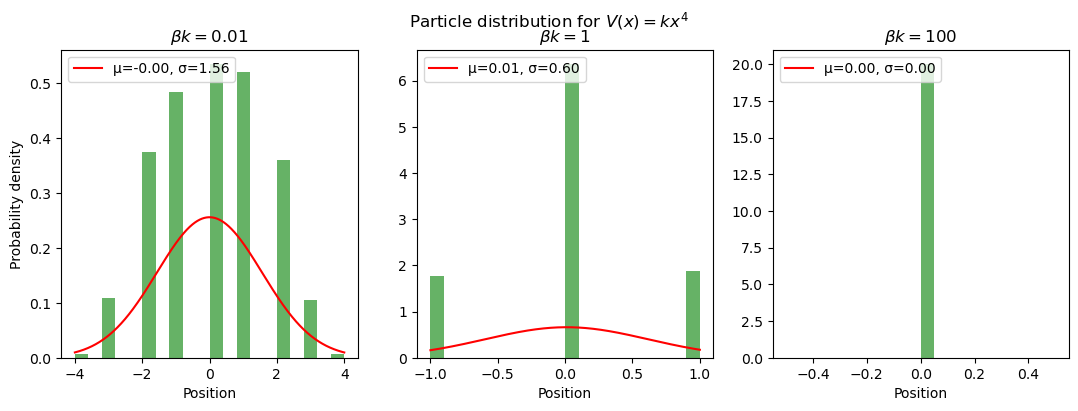

In [20]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k*x**4'], r'$V(x)=kx^4$')

$\beta k$ can to some extent be interpreted as the ratio between the potential energy scale and the thermal energy scale: $$\beta k = \frac{k}{k_BT}.$$ From this definition, a low value of $\beta k$ implies that the temperature $T$ is high and therefore the thermal energy is high. By implementing the results from excercise 1c), we know that at high temperatures the probability of the particle moving to the right, left or staying put is identical $= \frac{1}{3}$ since the energy is constant. This is also shown in the plot for $\beta k=0.01$, since the position of the particles fits a normal distribution. 

By the same argument; if $\beta k$ is high then $V(x) \gg k_BT$ and $T$ must be low relative to the potential energy. Again by 1c) we know that if the difference in the potential energy is greater than the thermal energy, the particles will move towards the lowest energy value and hence the movement is determined by $V(x)$. $V(x) = kx^4$ is a symmetrical potential which increases on both sides of the y-axis. At the initial position $x = 0$ the particles are at the lowest energy level in the potential. $k$ is a scalar such that $|V(x+1)-V(x)|$ increases for higher values of $k$. Therefore, if $\beta k$ is high then either the temperature is low or the incline of the potential is high. Either way the potential energy will dominate the random walk behaviour. As a result, for $\beta k = 100$, all the particles are located at the initial position $x = 0$, because a step towards the left or right increases the energy. This also holds if the particles initial position $\neq 0$, since the steps of the particles will be in the direction of the least amount of energy, thus ending up in $x = 0$.

**Conclusion**

Yes, $\beta k$ can be used to determine whether the thermal energy or potential energy dominates behaviour of the particles. 
<hr>

## **Exercise 3:** _Random walk in a ratched potential_

For this excercise we are going to plot the position of the particles and the current they create while moving in one of the two potentials
$$
V_1(x) = 
\begin{cases}
    k \frac{x}{\alpha N x}, & 0 < x \leq \alpha N x \\
    -k \frac{x}{(1 - \alpha) N x} & -(1 - \alpha) N x < x \leq 0
\end{cases}
$$
or
$$
V_2(x) = k.
$$ 



The structure of this excercise is similar to that of task 2, with the majority of the functions defined here and used later on.

**Functions definitions used by later blocks**

In [23]:
# Defines the potential function and analytical average current function

def sawtoothPotential(x, alpha, N_x): # can only get values between -100 and 100
    if x > -N_x and x <= -(1 - alpha) * N_x:
        return k * (x + N_x) / (alpha * N_x)
    if x > -(1 - alpha) * N_x and x <= 0:
        return - k * x / ((1 - alpha) * N_x)
    if x > 0 and x <= alpha * N_x:
        return k * x / (alpha * N_x)
    if x > alpha * N_x and x <= N_x:
        return - k * (x-N_x) / ((1 - alpha) * N_x)
    else:
        return False

def analyticalAverageCurrent(alpha, T_p, N_x):
    return N_x / (4 * T_p) * (erfc(alpha * N_x / 2 * np.sqrt(3/T_p)) - erfc((1-alpha) * N_x / 2 * np.sqrt(3/T_p)))

def progressBar(iterable, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    https://stackoverflow.com/questions/3173320/text-progress-bar-in-terminal-with-block-characters
    Call in a loop to create terminal progress bar
    @params:
        iterable    - Required  : iterable object (Iterable)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    total = len(iterable)
    # Progress Bar Printing Function
    def printProgressBar (iteration):
        percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Initial Call
    printProgressBar(0)
    # Update Progress Bar
    for i, item in enumerate(iterable):
        yield item
        printProgressBar(i + 1)
    # Print New Line on Complete
    print()

N_x = 100 # steps per potetial period
k = 1

In [24]:
# Particle class
class Particle:
    def __init__(self, potentialFunction, alpha, startPos = 0, betak=1000, N_x=100, id = False):
        self.alpha = alpha
        self.id = id
        self.xPos = startPos
        self.time = 0
        self.absxPos = 0
        self.movement = 0
        self.sawtoothPotetial = potentialFunction
        self.constantPotetial = lambda x, alpha, N_x: 1
        self.activePotetial = self.constantPotetial
        self.betak = betak
        self.N_x = N_x

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos - 1, self.alpha, self.N_x)
                                               - self.activePotetial(self.xPos + 1, self.alpha, self.N_x))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos, self.alpha, self.N_x)
                                             - self.activePotetial(self.xPos + 1, self.alpha, self.N_x))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos + 1, self.alpha, self.N_x)
                                               - self.activePotetial(self.xPos - 1, self.alpha, self.N_x))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos, self.alpha, self.N_x)
                                             - self.activePotetial(self.xPos - 1, self.alpha, self.N_x))))

    def potentialSwitch(self):
        if self.activePotetial == self.constantPotetial:
            self.activePotetial = self.sawtoothPotetial
        else:
            self.activePotetial = self.constantPotetial

    def walkStep(self, T_p):
        self.time += 1

        if self.time % T_p == 0:
            self.potentialSwitch()
        
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.movement = -1
            self.xPos -= 1
            self.absxPos -= 1
            if self.xPos < -self.N_x:
                self.xPos = self.N_x

        elif prob > 1 - self.pPlus():
            self.movement = 1
            self.xPos += 1
            self.absxPos += 1
            if self.xPos > self.N_x:
                self.xPos = -self.N_x
        else:
            self.movement = 0
        
        return self.absxPos
    
    def getPosition(self):
        return self.xPos
    
    def getProbebility(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())

    def __str__(self):
        if self.id:
            return f"{self.id + 1}: {self.xPos}"
        else:
            return f"{self.xPos}"

In [25]:
# Funtions for reading and writing data to files
def generateData(N_p, opg3b=False, opg3c=False, opg3d=False, opg4b=False, opg4c=False):
    if opg3b:
        print("Running opg3b")
        averageCurrent01 = opg3bSim(0.1, N_p)
        averageCurrent02 = opg3bSim(0.8, N_p) 
        with open('data\\results_opg3b.txt', 'w') as file:
            file.write("averageCurrent01:\n")
            file.write("\n".join(map(str, averageCurrent01)) + "\n")
            file.write("averageCurrent02:\n")
            file.write("\n".join(map(str, averageCurrent02)) + "\n")

    if opg3c:
        print("Running opg3c")
        T_pList, averageCurrent = opg3cSim(N_p) 
        with open('data\\results_opg3c.txt', 'w') as file:
            file.write("T_pList and averageCurrent:\n")
            for T_p, avg_current in zip(T_pList, averageCurrent):
                file.write(f"{T_p}, {avg_current}\n")

    if opg3d:
        print("Running opg3d")
        alphaList, averageCurrent = opg3dSim(N_p)
        with open('data\\results_opg3d.txt', 'w') as file:
            file.write("alphaList and averageCurrent:\n")
            for alpha, avg_current in zip(alphaList, averageCurrent):
                file.write(f"{alpha}, {avg_current}\n")
    
    if opg4b:
        print("Running opg4b")
        N_x = 10
        T_pList = np.linspace(80, 1500, 20).astype(int)
        averageCurrent = opg4bSim(N_p, N_x, T_pList)
        with open('data\\results_opg4b.txt', 'w') as file:
            file.write("T_pList and averageCurrent:\n")
            for T_p, avg_current in zip(T_pList, averageCurrent):
                file.write(f"{T_p}, {avg_current}\n")

    if opg4c:
        print("Running opg4c")
        betakList = [0.1, 1, 2, 3, 5, 10]
        for i, betak in enumerate(betakList):
            alphaList, averageCurrent = opg4cSim(N_p, betak)
            with open(f'data\\results_opg4c_betak_{i}.txt', 'w') as file:
                file.write("alphaList and averageCurrent:\n")
                for alpha, avg_current in zip(alphaList, averageCurrent):
                    file.write(f"{alpha}, {avg_current}\n")
        
        
def getData(choice=None):
    if choice == "opg3b":
        with open('data\\results_opg3b.txt', 'r') as file:
            lines = file.readlines()

            averageCurrent01 = []
            averageCurrent02 = []

            section = None
            for line in lines:
                line = line.strip()
                if line == "averageCurrent01:":
                    section = "averageCurrent01"
                elif line == "averageCurrent02:":
                    section = "averageCurrent02"
                elif section == "averageCurrent01" and line:
                    averageCurrent01.append(float(line))
                elif section == "averageCurrent02" and line:
                    averageCurrent02.append(float(line))
        return averageCurrent01, averageCurrent02

    elif choice == "opg3c":
        with open('data\\results_opg3c.txt', 'r') as file:
            lines = file.readlines()

            T_pList = []
            averageCurrent03 = []

            for line in lines:
                line = line.strip()
                if line and line != "T_pList and averageCurrent:":
                    T_p, avg_current = map(float, line.split(', '))
                    T_pList.append(T_p)
                    averageCurrent03.append(avg_current)
        return T_pList, averageCurrent03

    elif choice == "opg3d":
        with open('data\\results_opg3d.txt', 'r') as file:
            lines = file.readlines()

            alphaList = []
            averageCurrent = []

            for line in lines:
                line = line.strip()
                if line and line != "alphaList and averageCurrent:":
                    alpha, avg_current = map(float, line.split(', '))
                    alphaList.append(alpha)
                    averageCurrent.append(avg_current)
        return alphaList, averageCurrent

    elif choice == "opg4b":
        with open('data\\results_opg4b.txt', 'r') as file:
            lines = file.readlines()

            T_pList = []
            averageCurrent = []

            for line in lines:
                line = line.strip()
                if line and line != "T_pList and averageCurrent:":
                    T_p, avg_current = map(float, line.split(', '))
                    T_pList.append(T_p)
                    averageCurrent.append(avg_current)
        return T_pList, averageCurrent
    
    elif choice == "opg4c":
        
        betak_files = [f for f in os.listdir('data') if f.startswith('results_opg4c_betak_')]
        betakSimList = []
        for betak_file in betak_files:
            with open(os.path.join('data', betak_file), 'r') as file:
                lines = file.readlines()
                alphaList = []
                averageCurrent = []
                for line in lines:
                    line = line.strip()
                    if line and line != "alphaList and averageCurrent:":
                        alpha, avg_current = map(float, line.split(', '))
                        alphaList.append(alpha)
                        averageCurrent.append(avg_current)
                betakSimList.append(averageCurrent)

        return betakSimList
    
    else:
        print("Invalid choice")
        return None

# endregion


<hr>

## 3a)
We are going to plot the absolute position of three particles after moving 30 000 steps. The absolute position is calculated by looking at the movement of the particle from the initial position $x_0 = 0$.

In [28]:
def opg3aSim():
    alpha = 0.1
    T_p = 200
    N_p = 3
    cycles = 75
    timeSteps = cycles * 2 * T_p

    Particles = [Particle(sawtoothPotential, alpha) for _ in range(N_p)]
    ParticlesAbsPos = [[] for _ in range(N_p)]
    for i, particle in enumerate(Particles): # simulates all particles
        ParticlesAbsPos[i] = [particle.walkStep(T_p) for _ in range(timeSteps)] # run walkstep [simulation] for all
                                                                                # particles and store the absolute position    
    return ParticlesAbsPos

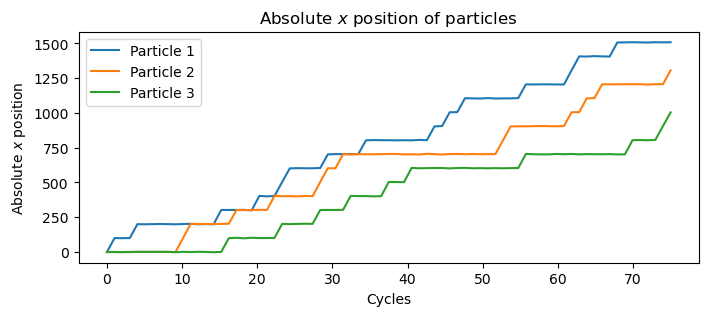

In [29]:
ParticlesAbsPos = opg3aSim()
plt.figure(figsize=(8, 3))
for i, Pos in enumerate(ParticlesAbsPos): # plots each particles absolute position
    AbsolutePosAxis = np.linspace(0, len(Pos[::400]), len(Pos[::400]))
    plt.plot(AbsolutePosAxis, Pos[::400], markersize=1, label=f"Particle {i + 1}")

plt.title(r"Absolute $x$ position of particles")
plt.xlabel("Cycles")
plt.ylabel(r"Absolute $x$ position")
plt.legend()
plt.show()

We observe a trend where each particle tend to move towards the right. This models the physical phenomena of a motor protein traversing along the cytoskeleton of a cell. Each particle represents a arbitrary motor protein, while the two potentials is a model of two different energy landscapes where the motor protein exists.

- The constant potential describes a landscape in which the particle is in a diffused state. This describes an unbound state dominated by thermal energy. As a result, the movements of the particle is dominated by random motion, as it was described in the previous exercise. Thus, in this constant energy landscape, the particle has unbiased movement. In a physical sense, this models the motor protein being free to explore its surroundings. 

- This is in contrast to the particle being in the sawtooth potential. Physically, this represents the motor protein traversing a set direction in a bound state. The movement in this energy landscape is largely determined by the potential gradient, as the asymetric lanscape creates a bias towards a certain direction. This directed movement is often the effect of the motor protein exploiting the energy from ATP to drive its movement. 
<hr>

## 3b)
The movement of the particles create a current. In this task we are going to calculate the average current created in ten different cycles. Each of the particles will move 500 steps before switching potential. After 500 more time steps it switches back, this is referred to as a cycle.

In [50]:
def opg3bSim(alpha, N_p):
    T_p = 500 
    cycles = 10
    timeSteps = cycles * 2 * T_p
    startPositons = np.linspace(-N_x, N_x, N_p)
    normalizedParticleCurrent = []

    Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPositons]
    for _ in progressBar(range(timeSteps), prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over timesteps
        [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
        movementCount = Counter(particle.movement for particle in Particles)
        normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)

    split_array = np.array_split(normalizedParticleCurrent, cycles)
    averageCurrent = [float(np.mean(part)) for part in split_array] # average current per cycle

    return averageCurrent

In [30]:
# generateData(N_x * 12, opg3b=True)
print("Ten cycle-averaged currents: ")
averageCurrent01, averageCurrent02 = getData("opg3b")
print("Alpha = 0.1:")
for i, val in enumerate(averageCurrent01):
    print(f"{i + 1}: {val:.1e} ", end="", flush=True)
print("")
print("Alpha = 0.8:")
for i, val in enumerate(averageCurrent02):
    print(f"{i + 1}: {val:.1e} ", end="", flush=True)

Ten cycle-averaged currents: 


FileNotFoundError: [Errno 2] No such file or directory: 'data\\results_opg3b.txt'

- The particles oscillate between the constant and sawtooth energy landscape, and the asymmetric shape of the sawtooth potential creates a bias in the average current. As a result, the particles will always experience a net movement, and we get a non-zero current. The physical result is seen in how the motor proteins move in a certain direction while attached the cytosceleton and in random direction when not.

- The resulting simulation yields a $J_{avg}(0)$ noticably larger than any $J_{avg}(n)$ for $n > 0$. This may be explained by a geometrical consideration of the situation. The uniformly distributed particles on the constant potential $V_2(x)$ switching to the sawtooth potential $V_1(x)$ yields a net-current towards the right. This is a result of the left hand side of the potential well covering more surface area than the much steeper right hand side. As the newly distributed particles are then switched back to $V_1(x)$, their positions may be diffused albeit still on average residing in their respective positions before jumping from $V_2(x)$. In the following cycle, as the particles are then switched back to the sawtooth potential, the particles will once again flow towards the potential well. In conclusion the first cycle has a uniqe starting position compared to the following cycles, resulting in a higher average current.

- The physical interpretation would be that the motor proteins start evenly distributed at the start of the first cycle, but in subsequent cycles the motor proteins get excited at the potential minimas.

Switching the value of $\alpha$ from $0.8$ to $0.1$, we first notice that the flux is now negative. Still, $J_{avg}(0)$ compared to $J_{avg}(n)$ for $n > 0$ is consistent with the result from before. We start with a relatively large absoulute amplitude, which stabilizes in the subsequent cycles.



<hr>

## 3c)
From now on all the particles start in $V_2$, with half of the particles initial position in the x-position corresponding to the minima of $V_1$, and the other half in the x-position corresponding to the second minima of $V_1$.

In [52]:
def opg3cSim(N_p):
    alpha = 0.8
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    T_pList = np.linspace(1, 1001, 50).astype(int)
    for T_p in progressBar(T_pList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different timeintervals: 
        Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPosistions]   
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)
        averageCurrent.append(float(np.mean(normalizedParticleCurrent)))  # avg current per T_p
        normalizedParticleCurrent.clear()
    return T_pList, averageCurrent


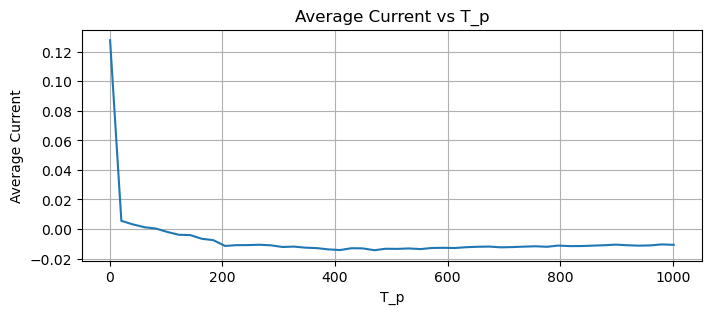

In [69]:
# generateData(N_x * 40, opg3c=True)
T_pList, averageCurrent03 = getData("opg3c")
plt.figure(figsize=(8, 3))
plt.plot(T_pList, averageCurrent03)
plt.xlabel("T_p")
plt.ylabel("Average Current")
plt.title("Average Current vs T_p")
plt.grid()
plt.show()

The simulation firstly illustrates that small values of $T_p$ will yield a small net-current. We then observe that increasing $T_p$ will increase the absolute magnitude of the average current up to a certain point where the magnitude decreases. The initial magnitude increase may be explained by considering the particles as being stuck in the potential well for very small values of $T_p$. A small $T_p$ will represent a particle existing in the constant energy landscape for a short amount of time before being de-excited to the sawtooth potential. The particles will quickly fall towards the potential well, and does not get a sufficient amount of time to diffuse in $V_2(x)$ before being sendt back to $V_1(x)$. When we however increase $T_p(x)$, we effectively allow the particles to spread out from the well. As the particles get diffused, more particles are allowed to move before falling back into the potential well. The stabilizing flux is the same phenomena we discussed in the previous excercice; the particles slowly being more densily localized around the potential well. The decrease in flux may on the other hand be explained by random motion being more dominent in the behaviour of the particles, as the particles will spend a significant amount of time in the thermal energy dominated energy landscape for larger $T_p$.

<hr>

## 3d)

In [54]:

def opg3dSim(N_p):
    T_p = 500
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    alphaList = np.linspace(0, 1, 50)
    for alpha in progressBar(alphaList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different alphas
        Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPosistions]
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p) # calculate current
        averageCurrent.append(float(np.mean(normalizedParticleCurrent))) # avg current per alpha
        normalizedParticleCurrent.clear()

    return alphaList, averageCurrent

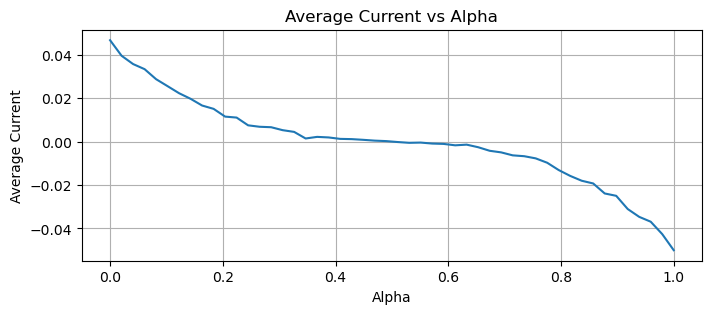

In [68]:
# generateData(N_x * 12, opg3d=True)
alphaList, averageCurrent04 = getData("opg3d")
plt.figure(figsize=(8, 3))
plt.plot(alphaList, averageCurrent04)
plt.xlabel("Alpha")
plt.ylabel("Average Current")
plt.title("Average Current vs Alpha")
plt.grid()
plt.show()

We observe that $J_{avg}$ decays exponentially as $\alpha$ approaches $0.5$ from either side. Moreover, we observe that the particle flux is positive for $\alpha \in [0, 0.5]$, and negative for $\alpha \in [0.5, 1]$. This is explained by the geometry of the sawtooth potential, as it is asymmetrical for $\alpha \neq 0.5$.

As we discussed in exercise 3b, we saw that a small value of $\alpha$ led to a net-flux towards the right. Looking at the geometry of $V_1(x)$, we see that this is due to the left hand side of the potential well not being as steep compared to the right hand side. This allows more particles to populate this side of the potential barrier compared to the contrary. An $\alpha \in [0, 0.5]$ then gives positive values of $J_{avg}$, though exponentially decaying as it approaches $0.5$. 

As it was also shown in exercise 3b, bigger values of $\alpha$ will yield a net-negative $J_{avg}$. We observe that for $\alpha\in [0.5, 1]$, the geometry of the sawtooth function will now be antisymmetrical juxtaposed to the first case, leading to the particles on average moving towards the left. Similar to when we had small values for $\alpha$, $J_{avg}$ will have a larger current when $\alpha$ is closer to $1$, but will decay exponentially as it approaches $0.5$.

<hr>

## **Exercise 4:** _Analytical solution_
<hr>

This exercise will revolve around comparing our simulated data to the analytical model which we derived in the first exercise and in the argument given in theory section of exercise 4. Furthermore, we will subject our numerical models to some proposed conditions during these comparisons in an effort to figure out apparent limitations in the analytical function.

## 4a)

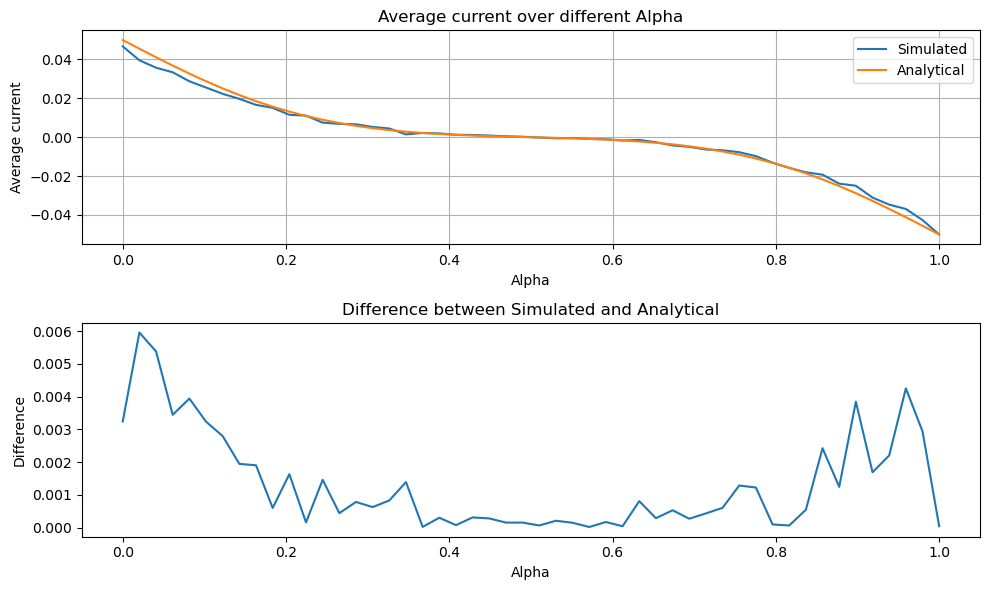

In [67]:
T_p = 500
N_x = 100
alphaList, averageCurrent04 = getData("opg3d")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,6))
ax1.plot(alphaList, averageCurrent04, label="Simulated")
ax1.plot(alphaList, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList], label="Analytical")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Average current")
ax1.set_title("Average current over different Alpha")
ax1.grid()
ax1.legend()
ax2.plot(alphaList, [abs(sim - ana) for sim, ana in zip(averageCurrent04, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList])])
ax2.set_xlabel("Alpha")
ax2.set_ylabel("Difference")
ax2.set_title("Difference between Simulated and Analytical")

plt.tight_layout()
plt.show()

The plots above shows our simulated cycle-average of the particle current as a function of $\alpha$, compared to the analytical model of $J_{avg}$. We observe the simulated model to be an adequate approximation to the analytical equation, although it has some noticable discrepency on the boundaries.

<hr>

## 4b)

In [57]:
def opg4bSim(N_p, N_x, T_pList):
    alpha = 0.8
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [N_x] * (N_p // 2)
    for T_p in progressBar(T_pList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different timeintervals: 
        Particles = [Particle(sawtoothPotential, alpha, startPos, N_x=N_x) for startPos in startPosistions] 
        for _ in range(int(2 * T_p )): # Iterate over timesteps 
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)
        averageCurrent.append(float(np.mean(normalizedParticleCurrent)))  # avg current per T_p
        normalizedParticleCurrent.clear()
    return averageCurrent

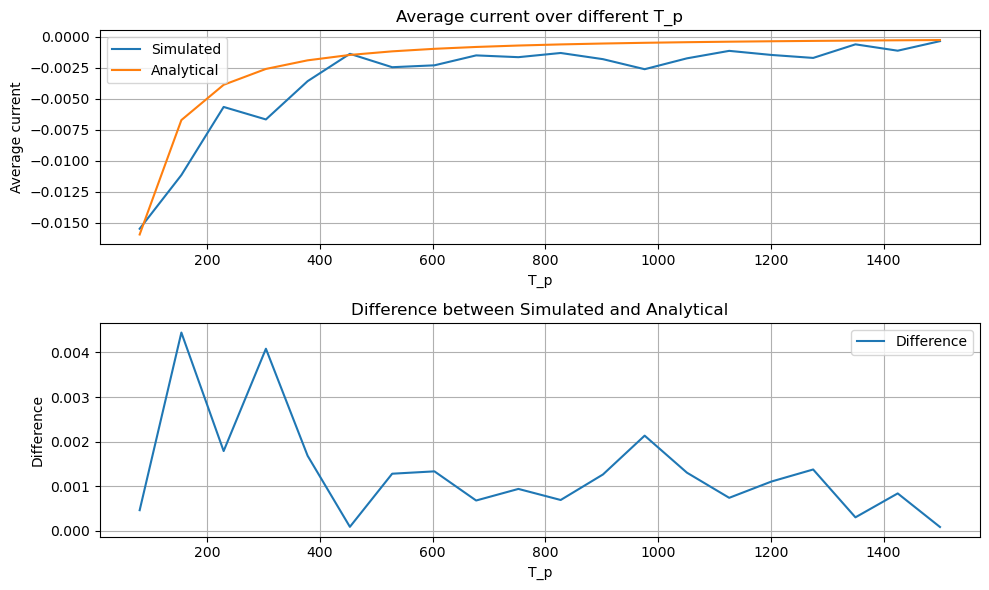

In [65]:
# generateData(400, opg4b=True)
alpha = 0.8
N_x = 10
T_pList, averageCurrent = getData("opg4b")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
ax1.plot(T_pList, averageCurrent, label="Simulated")
ax1.plot(T_pList, [analyticalAverageCurrent(alpha, T_p, N_x) for T_p in T_pList], label="Analytical")
ax1.set_xlabel("T_p")
ax1.set_ylabel("Average current")
ax1.set_title("Average current over different T_p")
ax1.grid()
ax1.legend()
ax2.plot(T_pList, [abs(sim - ana) for sim, ana in zip(averageCurrent, [analyticalAverageCurrent(alpha, T_p, N_x) for T_p in T_pList])], label="Difference")
ax2.set_xlabel("T_p")
ax2.set_ylabel("Difference")
ax2.set_title("Difference between Simulated and Analytical")
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

The plots above shows the average particle current as a function of $T_p$, compared to an analytical model. While observing the plot, we notice an apparant deviation between the analytical and numerical models. However, if we consider the plot of the difference between the two models, we see that the error is of equivalent magnitude as for the previous exercise.

The granular behaviour of the numerical function is a direct consequence of reducing the amount of datapoints, $T_p$, and amount of simulated particles. Looking past these aberrations, the numerical model still follows the same trend as one can see in the analytical model, while still being of same magnitude. 

<hr>

## 4c)

In [60]:
def opg4cSim(N_p, betak):
    T_p = 500
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    alphaList = np.linspace(0, 1, 50)
    for alpha in progressBar(alphaList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different alphas
        Particles = [Particle(sawtoothPotential, alpha, startPos, betak) for startPos in startPosistions]
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p) # calculate current
        averageCurrent.append(float(np.mean(normalizedParticleCurrent))) # avg current per alpha
        normalizedParticleCurrent.clear()

    return alphaList, averageCurrent

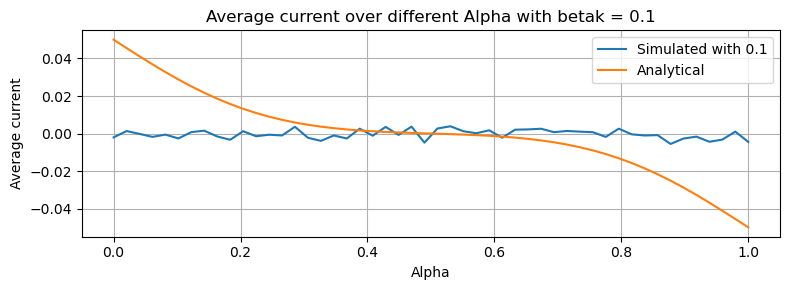

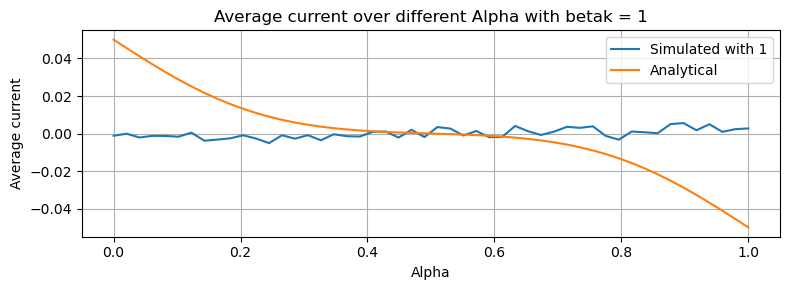

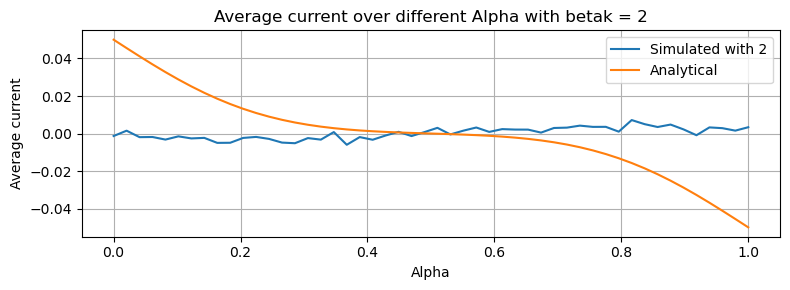

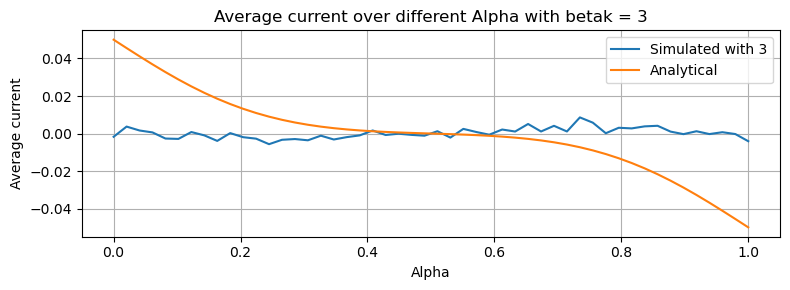

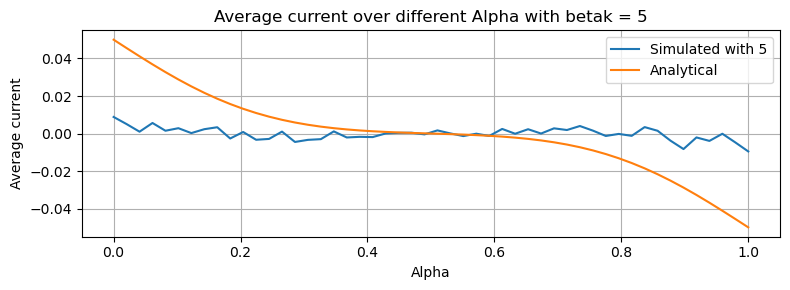

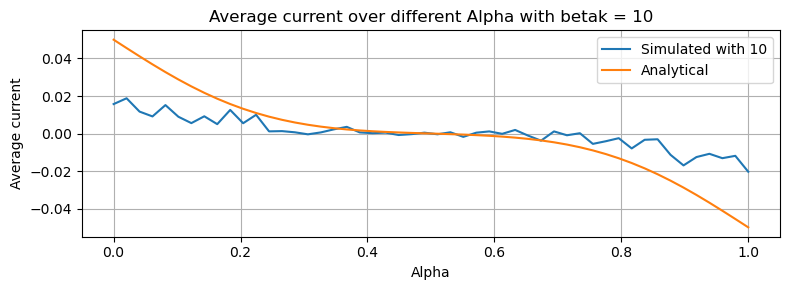

In [64]:
# generateData(N_x * 12, opg4c=True)
T_p = 500
N_x = 100
alphaList = np.linspace(0, 1, 50)
betakList = [0.1, 1, 2, 3, 5, 10]
averageCurrents = getData("opg4c")

for i, averageCurrent in enumerate(averageCurrents):
    plt.figure(figsize=(8, 3))
    plt.plot(alphaList, averageCurrent, label=f"Simulated with {betakList[i]}")
    plt.plot(alphaList, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList], label="Analytical")
    plt.xlabel("Alpha")
    plt.ylabel("Average current")
    plt.title(f"Average current over different Alpha with betak = {betakList[i]}")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

The plots shows an analytical and numerical model of the average particle current $J_{avg}$ as a function of $\alpha$, but evaluated for different $\beta k$.

The plots for different values of $\beta k$ shows a significant discreptancy between the analytical and numeric models. However, we see that the two models converge as $\alpha$ approaches $0.5$. Moreover, it's not before we let $\beta k = 10$ the numerical model follows the same growth trend of the analytical model around the boundries. 

## 4d)

First off, the argument assumes that the particles "will relax towards the potential minima". This is not true if the number of time steps in each potential, $T_{p}$, is too small. The particles will not have time to move into the potential minimas, and the particles will not have the distribution $\phi(x , t=T_{p} n) \sim \delta(x)$ for $n \in \Z$, and hence not be normal distrubuted around $x=0$. On the other side, if $T_{p}$ is too high the particles that emerged from the potential minimas, will "leak" into adjacent potential wells. The argument presented does not account for this, it assumes that all the particles that started in a minima stay there after a cycle. Resulting in the current deviating towards the edge in excercise 4c, even when $\beta$ becomes larger. Furthermore, the argument completely neglects the precence of thermal energy, which equates to assuming $\beta = \frac{1}{k_{b} \cdot T}$ is sufficently large, as was shown in excerice 4c is not always true. Lastly we used a discretization of the x-axis and time steps, while the argument presented used a continuous space and time model. If $N_{x}$ becomes small these affects become more prevelent. But we did not notice these affects in excercise 4.


<hr>